# PREDICTING THE PRICE OF A PRODUCT

In [35]:
# This library is used to handle the dataset 
import pandas as pd

# This library is used to make an array to constantly allocate memory
# this is also used in ML because extraction of data is quite fast
import numpy as np

# This library is used to plot data and graphs such as in MATLAB
import matplotlib.pyplot as plt

# This Library is used to give us various graphs 
# which shows relation between the datas of the dataset
import seaborn as sns

In [36]:
%matplotlib inline
# This is used so that we can plot our data in the jupyter notebook

In [37]:
#reading our csv file and importing our data and displaying it for reference
df = pd.read_csv('database.csv')
df

,days,discount,price
0,1,0.000,34999
1,2,0.000,34999
2,3,0.000,34999
3,4,0.000,34999
4,5,0.000,34999
...,...,...,...
360,361,0.141,30047
361,362,0.141,30047
362,363,0.141,30047
363,364,0.141,30047


In [38]:
#it is displaying the columns we have in our dataset
df.columns

Index(['days', 'discount', 'price'], dtype='object')

In [39]:
# Assigning no. of days to X which will be the training our data
X = df[['days']]

In [40]:
# y1 is a list of discount rate
# y2 is a list of prices after certain number of days
y1 = df['discount']
y2 = df['price']

In [41]:
# importing sklearn.moel_selection so that we can split the
# data into training and testing sets for our Linear Regression Model
from sklearn.model_selection import train_test_split

In [42]:
# Here we are splitting into training and testing sets
# 70 % of the data is being set to the training set
# while the remaining 30% is set for the testing our predictions
# all variables with 1 --> sets which will predict discount
# all variable with 2 --> sets which will predict the price of the product

X_train1 , X_test1 , y_train1, y_test1 = train_test_split(X, y1, test_size= 0.3, random_state = 101)
X_train2 , X_test2 , y_train2, y_test2 = train_test_split(X, y2, test_size= 0.3, random_state = 101)

In [43]:
# we have used this library for our LinearRegression purpouse because 
# while training our normal data using CostFunction and GradientDescent we were 
# encounterting overflow of data
# Hence I had to use LinearRegression method from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [44]:
# copying a method into a vaiable lm which we will use to
# train our discount data
lm = LinearRegression()

In [45]:
#Training our first Linear Regreession model which is going to predict the discount rate for our given product
lm.fit(X_train1,y_train1)
# The comment below displays us that LineaarRegression model has been succesfully applied to our model
# for predictiong the discount rate over the given number of days

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# it returns the parameters of the hypothesis
lm.coef_

array([0.00041697])

In [47]:
# it is making predictoions based upon the training data
predictions1 = lm.predict(X_test1)

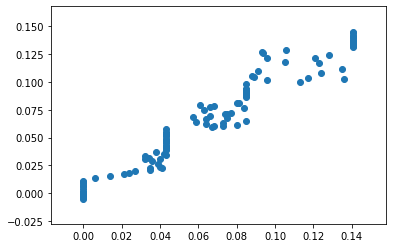

In [48]:
# it is plotting the data between the target variable and 
# corresponding predictions
plt.scatter(y_test1,predictions1)

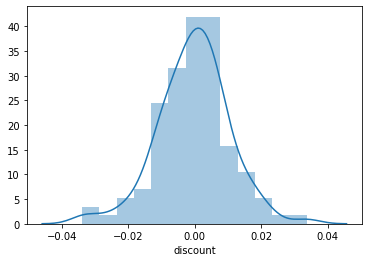

In [49]:
sns.distplot((y_test1-predictions1))

## Now we move on to Training our data for the price of our product

In [50]:
# here i am training my training data wrt to price
lm2 = LinearRegression()

In [51]:
# finding the cost function and gradient descent
# for the training data
lm2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# predicting the values of test data
# after getting the respective value from the training set
predictions2 = lm2.predict(X_test2)

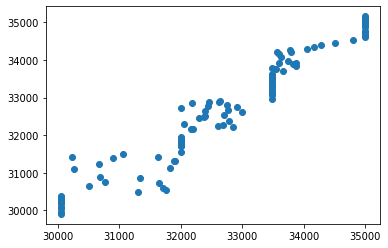

In [53]:
# plotting the value between the predictions and my 
# target data
plt.scatter(y_test2,predictions2)

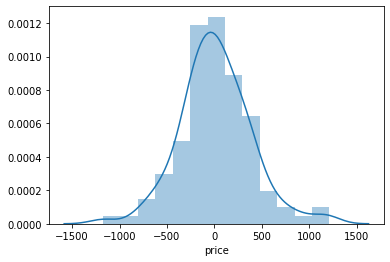

In [54]:
sns.distplot((y_test2-predictions2))

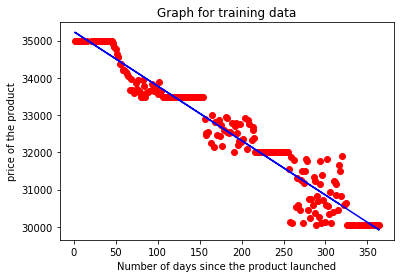

In [55]:
# here i am plotting my hypothesis line for price
# this is wrt to my training data
plt.scatter(X_train2, y_train2, color = 'red')
plt.plot(X_train2, lm2.predict(X_train2), color = 'blue')
plt.ylabel('price of the product')
plt.xlabel('Number of days since the product launched')
plt.title('Graph for training data')
plt.show()

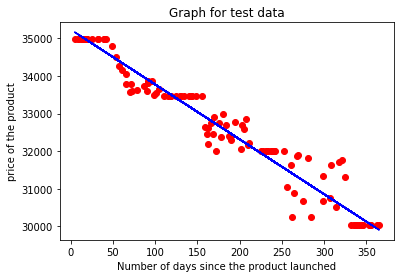

In [56]:
# the blue line is my hypothesis wrt to the test data
plt.scatter(X_test2, y_test2, color = 'red')
plt.plot(X_test2, lm2.predict(X_test2), color = 'blue')
plt.ylabel('price of the product')
plt.xlabel('Number of days since the product launched')
plt.title('Graph for test data')
plt.show()

In [57]:
# importing datime library which will help me to calculate days easily
import datetime

In [58]:
# getting the future date from the user and then splitting it into
# days, months and year
s = input('Enter the Date(DD-MM-YYYY) : ')
lst = list(map(int, s.split('-')))
lst

Enter the Date(DD-MM-YYYY) : 12-12-2020


[12, 12, 2020]

In [59]:
# here i am going to calculate the number of days passed since the launch
# of the product so that i can use to predict it
dte = datetime.date(lst[2], lst[1], lst[0])

tday = datetime.date.today()

diff_date = dte - tday

diff_date = str(diff_date)

s = ''
for i in diff_date:
    if i != ' ':
        s = s+i
    else:
        break
num = int(s)

In [60]:
# crearting an array from the number of days 
# so that i can use it in the predict module
a = np.array([num])
a = a.reshape((1,1))

In [61]:
# predicting the price and giving the user output
n1 = sum(lm2.predict(a))
n1 = round(n1)

n2 = sum(lm.predict(a))
n2 = round(n2,2)

if n2<0.02:
    print('The price predicted would be : {}'.format(max(df['price'])))
elif n2 > max(df['price']):
    print('The price predicted woule be : {}'.format( max(df['price']) ))
    
else:
    print('The price predicted would be : {}'.format(max(n1, 34999-(34999*n2) )))

The price predicted would be : 32199.08


#### Program to check the current price of my product

In [62]:
# importing my requestes module 
# this module will help me scrape the web
import requests

In [63]:
# setting the url and getting the user agent to set it for web scraping
URL = 'https://www.amazon.in/Test-Exclusive-746/dp/B07DJHXTLJ/ref=sr_1_1?dchild=1&keywords=oneplus+7t&qid=1589475271&sr=8-1'

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36'}



In [64]:
# this is to get different parts or texts from the webpage
from bs4 import BeautifulSoup

In [65]:
# here i get the price from the user and then send the email if the price has
# gone down else we don't
def check_price():
    page = requests.get(URL, headers = headers)
    soup = BeautifulSoup(page.content,'html.parser')

    title = soup.find(id = 'productTitle').get_text()
    price = soup.find(id = 'priceblock_ourprice').get_text()

    converted_price = price[2:8]
    s = ''
    for i in converted_price:
        if i != ',':
            s = s+i
    converted_price = int(s)

    n = int(input("Enter the price: "))

    if(converted_price< n):
        send_email()


    print(converted_price)
    print(title.strip())
    
    if(converted_price < n):
        send_email()

In [66]:
# importing smtplib to send mail to my user
import smtplib

In [71]:
# function which is sending mail to the user if certain criteria is made
def send_email():
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.ehlo()
    server.starttls()
    server.ehlo()
    server.login('roybrajeshoo7@gmail.com', 'nzcjdgbcelipkzxl')
    subject = 'Price Fell Down!!!'
    body = 'Check the amazon link  https://www.amazon.in/Test-Exclusive-746/dp/B07DJHXTLJ/ref=sr_1_1?dchild=1&keywords=oneplus+7t&qid=1589475271&sr=8-1'
    
    msg = f'Subject : {subject}\n\n{body}'
    
    server.sendmail(
        'roybrajeshoo7@gmail.com',
        'ceoreinds001@gmail.com',
        msg
    )
    
    print('HEY EMAIL HAS BEEN SENT')
    server.quit()

In [72]:
check_price()

Enter the price: 35000
HEY EMAIL HAS BEEN SENT
34999
OnePlus 7T (Glacier Blue, 8GB RAM, Fluid AMOLED Display, 128GB Storage, 3800mAH Battery)
HEY EMAIL HAS BEEN SENT
